Calculating the curve of growth for different ions based on different b values

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pint

In [190]:
ureg = pint.UnitRegistry()
c = 3e8 * ureg.m / ureg.s


In [191]:
def tau_0(N, f, wavelength, b): #Draine, Eq. 9.10
    return 0.7580 * (N/(1e13 *ureg.cm**(-2))) * (f/0.4164) * (wavelength/1215.7*ureg.angstrom) * ((10*ureg.km/ureg.s)/b)

def W_approx (b, tau_0, gamma, wavelength): #Draine Eq. 9.27
    #tau_0 = tau_0.magnitude
    if tau_0 < 1.253933:
        W = np.sqrt(np.pi)*(b/c)* (tau_0) *((1+tau_0/(2*np.sqrt(2)))**(-1))
    else:
        W = np.sqrt(((2*b)/c)**2) * np.log(tau_0/np.log(2)) + (b/c) * ((gamma*wavelength)/c) * ((tau_0 - 1.253933)/np.sqrt(np.pi))
    return wavelength * W

In [193]:
def width_calc(b, N, f, wavelength, gamma):
    """
    N and b are arrays of column density and Doppler parameter values, respectively.
    f and wavelength are the oscillator strength and wavelength of the transition.
    """
    width = np.zeros((len(N), len(b)))
    for i in range(len(N)):
        for j in range(len(b)):
            tau = tau_0(N[i], f, wavelength, b[j])
            tau = tau.magnitude
            w = W_approx(b[j], tau, gamma, wavelength)
            width[i,j] = w.magnitude
    return width

In [192]:
#defining wavelength, oscillator strength, and gamma for Fe II 2382, Fe II 2249, and C II 1334
wavelength = np.array([2382.7642, 2249.8768, 1334.5323]) * ureg.angstrom
f = np.array([0.320, 0.00182, 0.12780])
gamma = np.array([3.13e8, 3.31e8, 2.88e8]) * ureg.s**(-1)
N_Fe = np.linspace(1e12,1e17,1000) *ureg.cm**2  
N_C = np.linspace(1e13,1e17,1000) *ureg.cm**2   
b = np.array([1, 2, 3, 5])

In [194]:
width_F_1 = width_calc(b, N_Fe, f[0], wavelength[0], gamma[0])
width_F_2 = width_calc(b, N_Fe, f[1], wavelength[1], gamma[1])
width_C = width_calc(b, N_C, f[2], wavelength[2], gamma[2])

In [195]:
def plot_curve_of_growth(N, width, b):
    N = N.magnitude
    plt.figure()
    for i in range(len(b)):
        plt.plot(np.log10(N), np.log10(width[:,i]), label = 'b = {}'.format(b[i]))
        #plt.plot(N, width[:,i], label = 'b = {}'.format(b[i]))
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Column Density (cm$^{-2}$)')
    plt.ylabel('Equivalent Width (Angstrom)')
    plt.legend()
    plt.show()

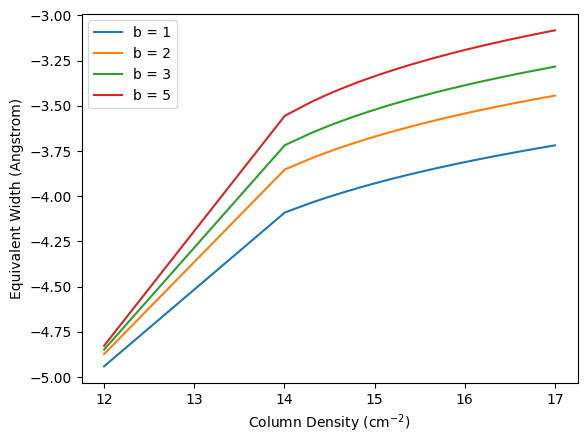

In [196]:
plot_curve_of_growth(N_Fe, width_F_1, b)